In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("mushroom.csv",sep=',',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
0     8124 non-null object
1     8124 non-null object
2     8124 non-null object
3     8124 non-null object
4     8124 non-null object
5     8124 non-null object
6     8124 non-null object
7     8124 non-null object
8     8124 non-null object
9     8124 non-null object
10    8124 non-null object
11    8124 non-null object
12    8124 non-null object
13    8124 non-null object
14    8124 non-null object
15    8124 non-null object
16    8124 non-null object
17    8124 non-null object
18    8124 non-null object
19    8124 non-null object
20    8124 non-null object
21    8124 non-null object
22    8124 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


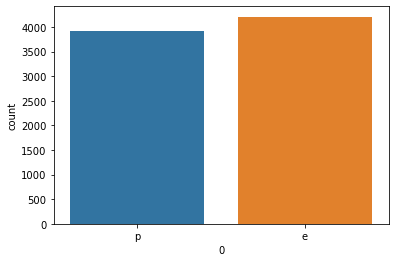

In [8]:
sns.countplot(df[0],data=df)

In [9]:
df[0].value_counts()

e    4208
p    3916
Name: 0, dtype: int64

In [10]:
x=df.iloc[:,1:]
x.head(2)

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g


In [11]:
y=df[0]
y.head(2)

0    p
1    e
Name: 0, dtype: object

In [12]:
x=pd.get_dummies(x,drop_first=True)

In [13]:
x.shape

(8124, 95)

In [14]:
x.head(2)

,1_c,1_f,1_k,1_s,1_x,2_g,2_s,2_y,3_c,3_e,...,21_n,21_s,21_v,21_y,22_g,22_l,22_m,22_p,22_u,22_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [15]:
y=pd.get_dummies(y,drop_first=True)

In [16]:
y.head(2)

,p
0,1
1,0


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
x=pca.fit_transform(x)

In [19]:
sum(pca.explained_variance_ratio_)

0.9286721304049376

In [20]:
x.shape

(8124, 50)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def maxf1 (clf,x,y):
    maxf=0
    rs=0
    for r_state in range(30,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=r_state)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        tmp=f1_score(y_test,pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random_state",rs,"it is",maxf)        
        

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
import warnings
warnings.filterwarnings("ignore")
lr=LogisticRegression()
maxf1(lr,x,y)

maximum f1_score is at random_state 32 it is 1.0


In [33]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lr,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lr,x,y,cv=5,scoring="f1").std())

Mean f1 score for logistic classifier:  0.9210793369727039
standard deviation in f1 score for logistic classifier:  0.1076243438332085


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'poly'}

In [35]:
svc=SVC(kernel="poly",C=0.1)
maxf1(svc,x,y)

maximum f1_score is at random_state 61 it is 1.0


In [34]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())

Mean f1 score for logistic classifier:  0.9288312088678905
standard deviation in f1 score for logistic classifier:  0.07461942059127635


In [27]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,20,40,80]}
rf=RandomForestClassifier()
gd=GridSearchCV(rf,parameters,cv=5,scoring="f1")
gd.fit(x,y)
gd.best_params_

{'n_estimators': 20}

In [28]:
rf=RandomForestClassifier(n_estimators=20)
maxf1(rf,x,y)

maximum f1_score is at random_state 32 it is 1.0


In [36]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(rf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(rf,x,y,cv=5,scoring="f1").std())

Mean f1 score for logistic classifier:  0.9126683943965291
standard deviation in f1 score for logistic classifier:  0.11289741473815895


In [29]:
dt=DecisionTreeClassifier()
maxf1(dt,x,y)

maximum f1_score is at random_state 46 it is 0.998326359832636


In [37]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(dt,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(dt,x,y,cv=5,scoring="f1").std())

Mean f1 score for logistic classifier:  0.9082811601583629
standard deviation in f1 score for logistic classifier:  0.11183502627687422


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
svc=SVC(kernel="poly",C=0.1)
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 61,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[842   0]
 [  1 782]]
f1 score is :  0.9993610223642173
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC ROC Score:  0.9993614303959131
